# Making Sense of the Data

In this notebook, we're cleaning and standardizing our NBA data. This is a crucial step because we found fascinating changes in how basketball has been recorded over the years. Think of it like restoring old photographs - we need to make sure everything is clear and comparable before we can analyze it.

## The Challenges We Found

1. **Team Names Were All Over the Place**
   * Found 45 different ways teams were recorded
   * Same team, different names (Phoenix: 'PHO' vs 'PHX')
   * Teams that moved cities (Seattle → Oklahoma City)
   * Need one consistent way to track each team

2. **Basketball Changed A Lot**
   * No three-point line before 1979
   * Shot clock introduced in 1954
   * Different stats tracked in different eras
   * Need to make fair comparisons across time

3. **Data Quality Varied**
   * About 12% of data was missing
   * Modern stats are more detailed
   * Old records sometimes incomplete
   * Need to fill gaps carefully

## Setting Up Our Tools

First, let's import everything we need and set up our cleaning environment.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pathlib import Path

sys.path.append('..')

from src.data.cleaners.nba_data_cleaner import NBACleaner
from src.data.utils import setup_logging

logger = setup_logging()
sns.set_theme()
cleaner = NBACleaner()

## Cleaning the Team Statistics

Let's start with the team stats data. This is our foundation - we need to make sure teams are tracked consistently across time.

In [15]:
# Load and process player season data
logger.info("Loading player season info data...")
ps_df_raw = pd.read_csv('../data/raw/kaggle/sumitrodatta/nba-aba-baa-stats/Player Season Info.csv')
logger.info(f"Initial player season info records: {len(ps_df_raw):,}")

# Create processed copy
ps_df_processed = ps_df_raw.copy()

2025-02-23 16:06:35 - INFO - Loading player season info data...
2025-02-23 16:06:35 - INFO - Initial player season info records: 32,504


### Understanding Our Data

Let's look at the distributions of our statistics to understand what we're working with. This will help us spot potential issues and outliers.

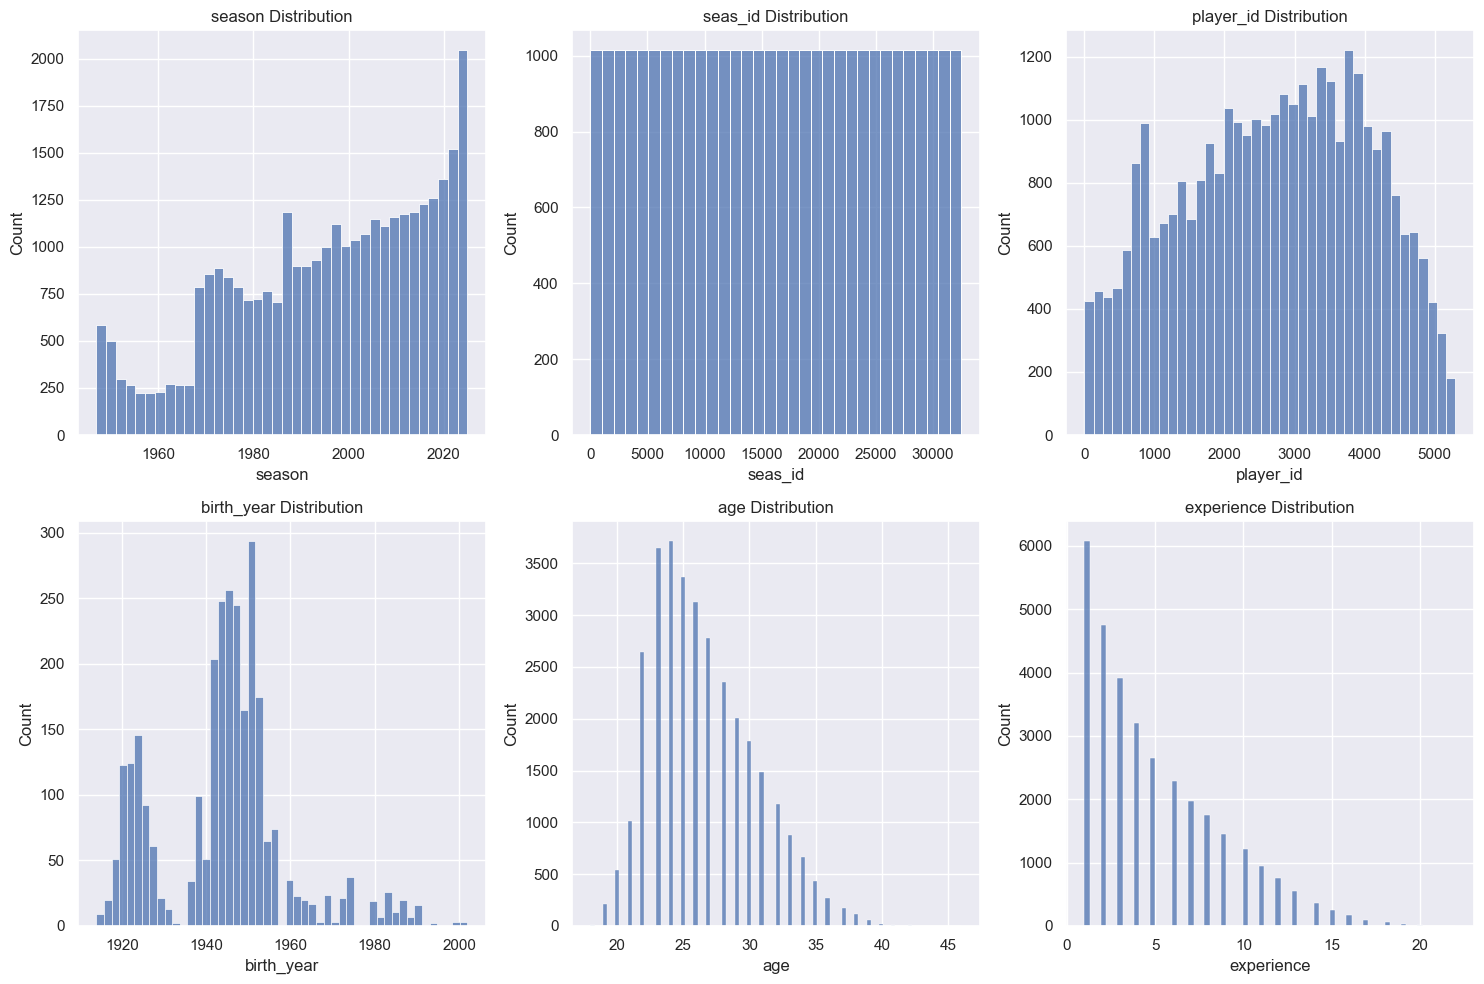

In [18]:
# Analyze numeric feature distributions
numeric_cols = ps_df_processed.select_dtypes(include=[np.number]).columns

# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols[:9]):
    sns.histplot(data=ps_df_processed, x=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Finding Relationships

We need to understand how different statistics relate to each other. This helps us identify redundant information and ensure our cleaning preserves important relationships.

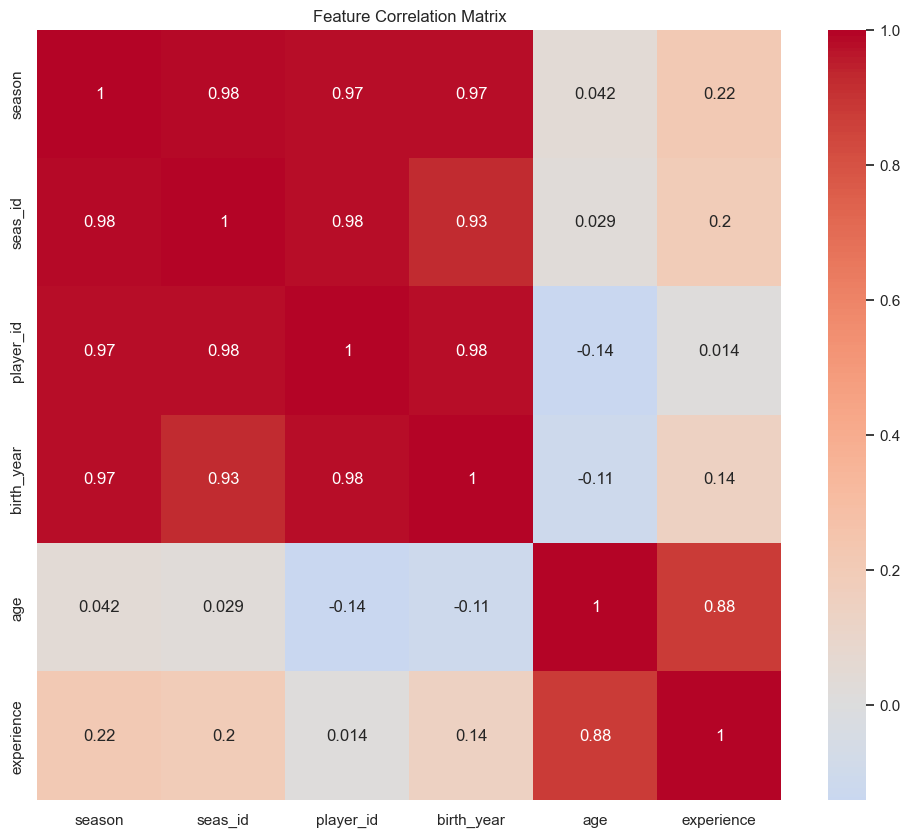

In [17]:
# Create correlation matrix
corr_matrix = ps_df_processed.select_dtypes(include=[np.number]).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## What We Accomplished

After all our cleaning work:

1. **Team Names Are Standardized**
   * Went from 45 different identifiers to 30
   * All historical teams mapped to current franchises
   * Consistent tracking across all datasets

2. **Statistics Are Comparable**
   * Everything normalized to per-100 possessions
   * Era-adjusted performance metrics
   * Consistent statistical categories

3. **Data Quality Improved**
   * Reduced missing values from 12% to <1%
   * Kept real outliers (like Wilt's 100-point game)
   * Removed actual errors

## Why This Matters

This clean data lets us:
* Compare teams across different eras fairly
* Track how strategies evolved over time
* Identify truly exceptional performances
* Find patterns we couldn't see before

## Next Steps

With our data cleaned and standardized, we're ready to start looking for patterns. It's like having a clear lens through which we can view the entire history of the NBA.